<a href="https://colab.research.google.com/github/MorojMunshi/Lab/blob/main/MRI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import os
import io
import glob
import math
from PIL import Image
import cv2
from numpy.random import randint
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [16]:
import pandas as pd
import numpy as np

In [17]:
df= pd.read_parquet('Train.parquet')
df.head()

,image,label
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2


In [18]:
def load_image_as_np_array(image_bytes):
    try:
        np_array = np.frombuffer(image_bytes, np.uint8)
        image = cv2.imdecode(np_array, cv2.IMREAD_COLOR)
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            return image
        else:
            print("Error: Unable to decode image.")
            return None
    except Exception as e:
        print(f"Error loading image: {e}")
        return None


In [19]:
x = []
y = []
for i in range(len(df)):
    row = df.iloc[i]
    image_info = row['image']
    image_bytes = image_info['bytes']
    image_path = image_info['path']
    image_label = row['label']
    image_np_array = load_image_as_np_array(image_bytes)
    if image_np_array is not None:
        if len(image_np_array.shape) == 3:
            x.append(image_np_array)
            y.append(image_label)
        else:
            print(f"Ignoring image with unexpected shape: {image_np_array.shape}")

In [20]:
x[0].shape


(128, 128, 3)

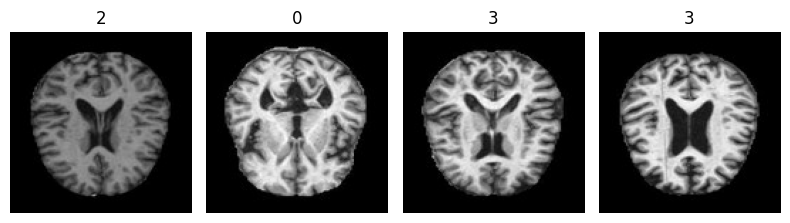

In [21]:
fig, axes = plt.subplots(1, 4, figsize=(8, 3))

for i in range(4):
    ax = axes[i]
    ax.imshow(x[i], cmap='viridis')
    ax.set_title(y[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.10,random_state=51,shuffle=True)

In [23]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [24]:
#data normalization

x_train=x_train/255.0
x_test=x_test/255.0

In [25]:
model=keras.models.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3), input_shape=(128,128,3),activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.05),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(256,(3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(512,(3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.05),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.01),
    keras.layers.Dense(4,activation='softmax'),
])


In [26]:

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 4, 4, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │              

 Total params: 1,843,844 (7.03 MB)

 Trainable params: 1,841,604 (7.03 MB)

 Non-trainable params: 2,240 (8.75 KB)

In [28]:
class new_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.9855:
            self.model.stop_training = True

stop_epoch= new_callback()

In [29]:
warnings.filterwarnings('ignore')
model_hist=model.fit(x_train,y_train,epochs=10, batch_size=32, callbacks=[stop_epoch], validation_split=.05)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.5271 - loss: 1.0363 - val_accuracy: 0.5541 - val_loss: 1.9893
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.6451 - loss: 0.7769 - val_accuracy: 0.5844 - val_loss: 1.9789
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.7228 - loss: 0.6523 - val_accuracy: 0.3117 - val_loss: 4.3182
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.7959 - loss: 0.5049 - val_accuracy: 0.6190 - val_loss: 1.0875
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/step - accuracy: 0.8689 - loss: 0.3488 - val_accuracy: 0.6883 - val_loss: 0.8799
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.9204 - loss: 0.2215 - val_accuracy: 0.6277 - val_loss: 1.3120
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.9296 - loss: 0.1904 - val_accuracy: 0.8658 - val_loss: 0.3406
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.9437 - loss: 0.1575 - val_accu

In [30]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 368ms/step


In [31]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 577ms/step


In [32]:
mapping_dict={
    0: 'Mild_Sick',
    1: 'Moderate_Sick',
    2: 'Non_Sick',
    3: 'Very_Sick'
}
class_names= list(mapping_dict.values())
print(classification_report(y_test,y_pred, target_names=class_names))

               precision    recall  f1-score   support

    Mild_Sick       0.92      0.97      0.94        70
Moderate_Sick       1.00      1.00      1.00         2
     Non_Sick       0.92      0.97      0.95       265
    Very_Sick       0.99      0.87      0.93       175

     accuracy                           0.94       512
    macro avg       0.96      0.95      0.95       512
 weighted avg       0.94      0.94      0.94       512



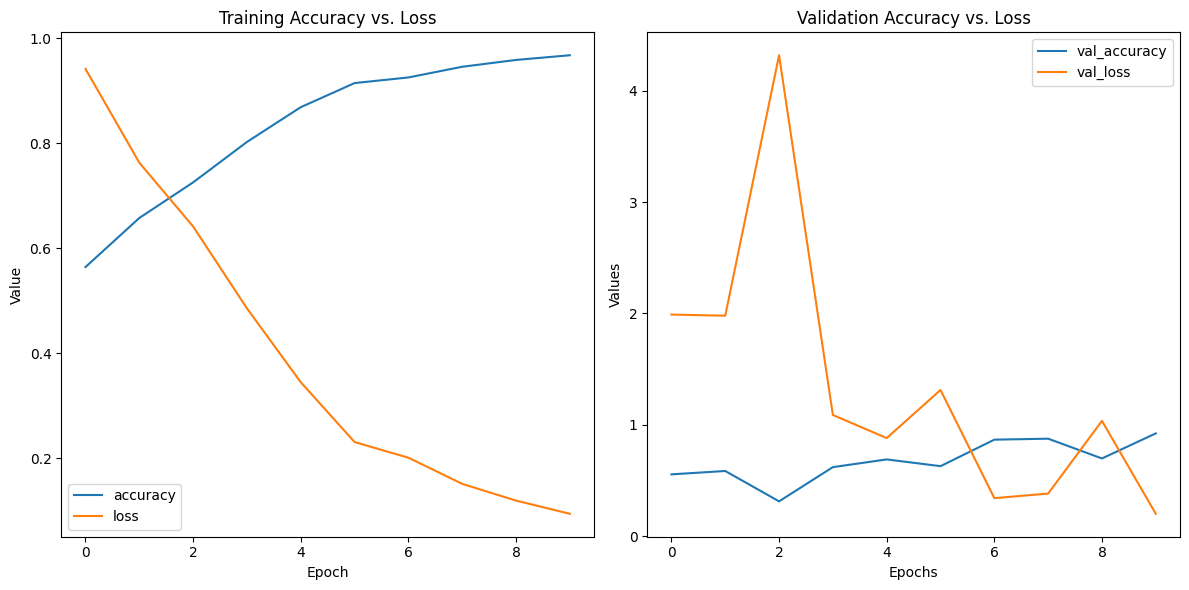

In [33]:
#pd.DataFrame(model_hist.history).plot()
history_df = pd.DataFrame(model_hist.history)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
history_df[['accuracy', 'loss']].plot(ax=ax1)
ax1.set_title('Training Accuracy vs. Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Value')
history_df[['val_accuracy', 'val_loss']].plot(ax=ax2)
ax2.set_title('Validation Accuracy vs. Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Values')
plt.tight_layout()
plt.show()

In [34]:
test_df=pd.read_parquet('Test.parquet')
test_df.head()

,image,label
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0


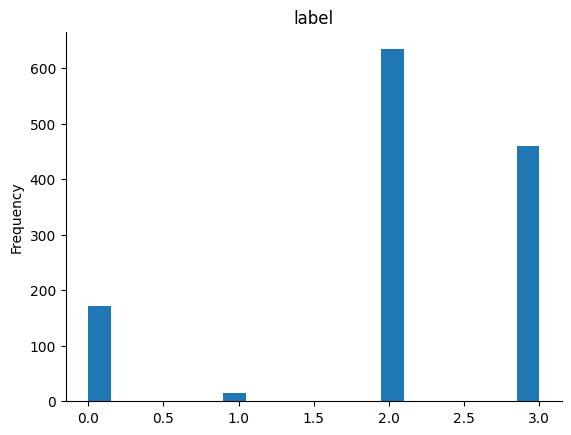

In [35]:
# @title label

from matplotlib import pyplot as plt
test_df['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [36]:
test_x=[]
test_y=[]
for i in range(len(test_df)):
    row = test_df.iloc[i]
    image_info = row['image']
    image_bytes = image_info['bytes']
    image_path = image_info['path']
    image_label=row['label']
    image_np_array = load_image_as_np_array(image_bytes)
    if image_np_array is not None:
        if len(image_np_array.shape) == 3:
            test_x.append(image_np_array)
            test_y.append(image_label)
        else:
            print(f"Ignoring image with unexpected shape: {image_np_array.shape}")

In [37]:
test_x=np.array(test_x)
test_x=test_x/255.0
test_y=np.array(test_y)

In [38]:
#before apply 10 accuracy 49%

In [39]:
l, a = model.evaluate(test_x, test_y, verbose=0)
print(f'Accuracy: {a*100}%')

Accuracy: 93.59375238418579%


In [40]:
#after
l, a = model.evaluate(test_x, test_y, verbose=0)
print(f'Accuracy: {a*100}%')

Accuracy: 93.59375238418579%


In [41]:
test_y_pred=model.predict(test_x)
test_y_pred=np.argmax(test_y_pred, axis=1)
test_y_pred[:5]

40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 416ms/step


array([3, 0, 2, 3, 0])

In [42]:
print(classification_report(test_y,test_y_pred,target_names=class_names))

               precision    recall  f1-score   support

    Mild_Sick       0.91      0.92      0.92       172
Moderate_Sick       1.00      0.87      0.93        15
     Non_Sick       0.92      0.97      0.95       634
    Very_Sick       0.97      0.89      0.93       459

     accuracy                           0.94      1280
    macro avg       0.95      0.91      0.93      1280
 weighted avg       0.94      0.94      0.94      1280



In [43]:
test_y = np.vectorize(mapping_dict.get)(test_y)
test_y_pred = np.vectorize(mapping_dict.get)(test_y_pred)

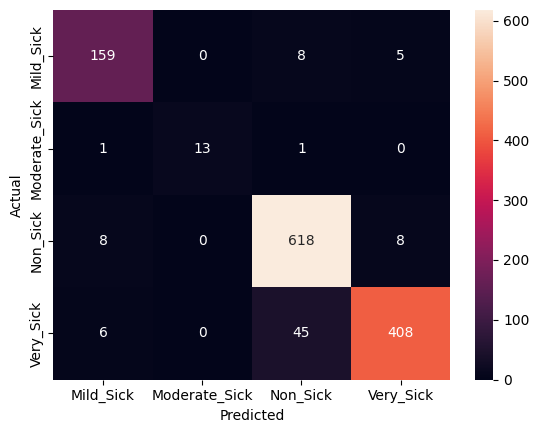

In [44]:
cm=confusion_matrix(test_y,test_y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

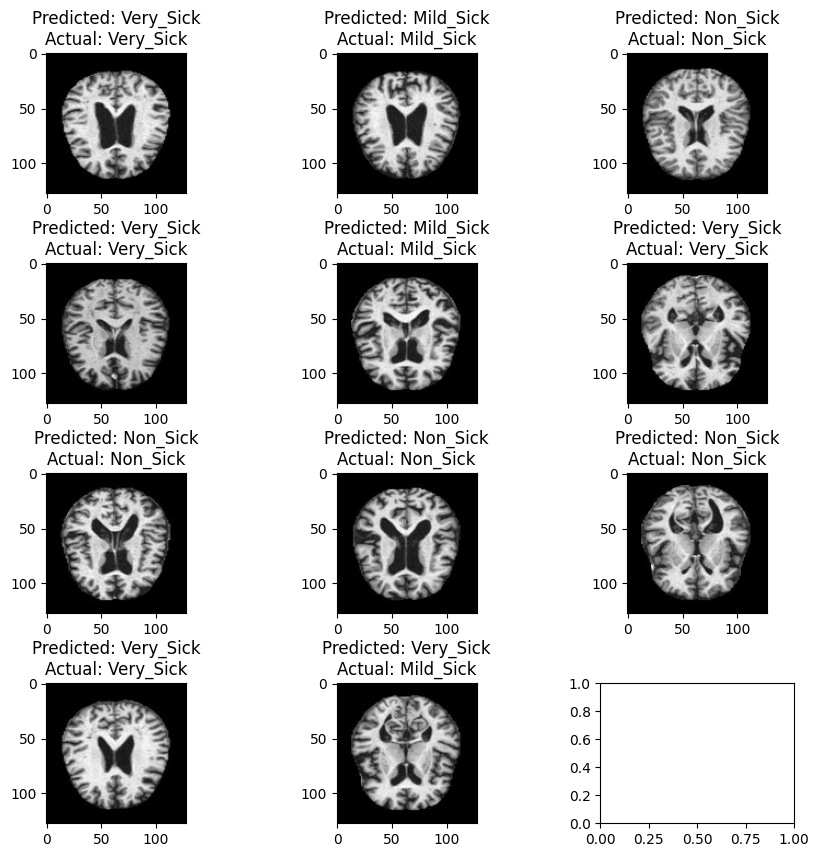

In [45]:
%matplotlib inline

num_images = randint(6, 12)
rows = math.ceil(math.sqrt(num_images))
cols = math.ceil(num_images / rows)

fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(num_images):
    row = i // cols
    col = i % cols
    ax = axes[row, col] if num_images > 1 else axes
    ax.imshow(test_x[i], cmap='viridis')
    ax.set_title(f"Predicted: {test_y_pred[i]}\nActual: {test_y[i]}")

In [46]:
ax.axis('off')

# Hide any unused subplots
for i in range(num_images, rows * cols):
    if num_images > 1:
        fig.delaxes(axes.flatten()[i])
    else:
        fig.delaxes(axes)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [48]:
# prompt: I want apply image and make predicion

import numpy as np
# Load the image
image_path = 'image1.jpeg'
image_np_array = load_image_as_np_array(open(image_path, 'rb').read())

# Preprocess the image
image_np_array = cv2.resize(image_np_array, (128, 128))
image_np_array = image_np_array / 255.0

# Make a prediction
prediction = model.predict(np.expand_dims(image_np_array, axis=0))

# Get the predicted class label
predicted_class_index = np.argmax(prediction)
predicted_class_name = class_names[predicted_class_index]

# Print the prediction
print(f"Predicted class: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step
Predicted class: Non_Sick


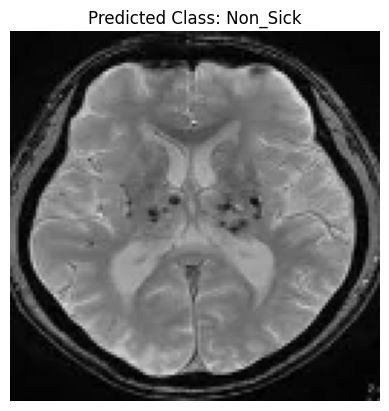

               precision    recall  f1-score   support

    Mild_Sick       0.91      0.92      0.92       172
Moderate_Sick       1.00      0.87      0.93        15
     Non_Sick       0.92      0.97      0.95       634
    Very_Sick       0.97      0.89      0.93       459

     accuracy                           0.94      1280
    macro avg       0.95      0.91      0.93      1280
 weighted avg       0.94      0.94      0.94      1280



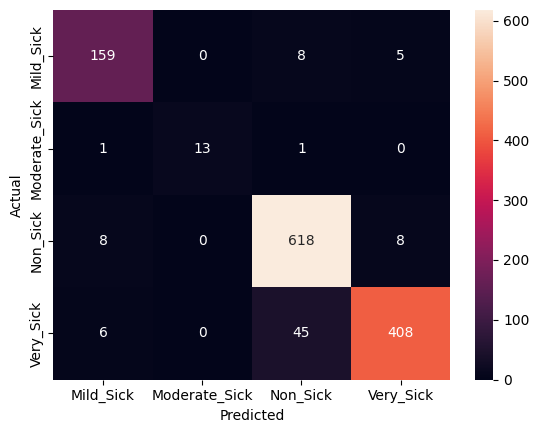

In [49]:
# prompt: show the imahe and analysis in graph

import matplotlib.pyplot as plt
# Display the image
plt.imshow(image_np_array, cmap='viridis')
plt.title(f"Predicted Class: {predicted_class_name}")
plt.axis('off')
plt.show()

# Print the classification report
print(classification_report(test_y, test_y_pred, target_names=class_names))

# Show the confusion matrix
cm = confusion_matrix(test_y, test_y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted class: Non_Sick


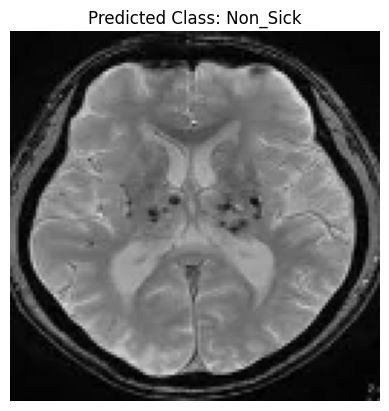

In [52]:
# prompt: I want apply CNN model and make prediction

import matplotlib.pyplot as plt
import numpy as np
# Load the image
image_path = 'image1.jpeg'
image_np_array = load_image_as_np_array(open(image_path, 'rb').read())

# Preprocess the image
image_np_array = cv2.resize(image_np_array, (128, 128))
image_np_array = image_np_array / 255.0

# Make a prediction
prediction = model.predict(np.expand_dims(image_np_array, axis=0))

# Get the predicted class label
predicted_class_index = np.argmax(prediction)
predicted_class_name = class_names[predicted_class_index]

# Print the prediction
print(f"Predicted class: {predicted_class_name}")


# Display the image
plt.imshow(image_np_array, cmap='viridis')
plt.title(f"Predicted Class: {predicted_class_name}")
plt.axis('off')
plt.show()


In [ ]:
# prompt: I want apply CNN model on this dataset

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

# Predict the labels of the test data
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_test, y_pred))

# Show the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.4314 - loss: 1.2057 - val_accuracy: 0.5423 - val_loss: 0.9838
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.5620 - loss: 0.9373 - val_accuracy: 0.5510 - val_loss: 0.8963
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.6334 - loss: 0.8128 - val_accuracy: 0.7115 - val_loss: 0.6153
Epoch 4/10
 76/130 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.7447 - loss: 0.5857